In [79]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected=True)
import datetime as dt



In [80]:
DF = pd.read_csv('C:\\Users\\mbond\\Downloads\\World Energy Consumption\\World Energy Consumption.csv')
pays = DF['country'].unique()

# Afficher la liste des pays
for pays in pays:
    print(pays)

Afghanistan
Africa
Albania
Algeria
American Samoa
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Asia Pacific
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
British Virgin Islands
Brunei
Bulgaria
Burkina Faso
Burundi
CIS
Cambodia
Cameroon
Canada
Cape Verde
Cayman Islands
Central African Republic
Central America
Chad
Chile
China
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Czechoslovakia
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
Eastern Africa
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Europe
Europe (other)
Faeroe Islands
Falkland Islands 
Fiji
Finland
France
French Guiana
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Gibraltar
Greece
Greenland
Grenada
Guadeloupe
Guam
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hong Kong
Hungary
Iceland
India
Indonesia

In [81]:

# Filtrer les colonnes nécessaires
DF = DF[['country', 'year', 'coal_production', 'electricity_generation', 'biofuel_electricity', 'coal_electricity', 'fossil_electricity', 'gas_electricity', 'hydro_electricity', 'nuclear_electricity', 'oil_electricity', 'renewables_electricity', 'oil_production', 'population', 'gdp', 'solar_electricity', 'wind_electricity', 'energy_per_gdp', 'energy_per_capita', 'fossil_share_elec', 'gas_share_elec', 'gas_production', 'low_carbon_share_elec']]

# Filtrer les données pour les années >= 1990
DF = DF[DF['year'] >= 1990]
# Filtrer les lignes pour les pays spécifiques
DF = DF.loc[DF['country'].isin(Countries)]

pays = DF['country'].unique()

# Afficher la liste des pays
for pays in pays:
    print(pays)


China
France
Germany
India
Japan
Saudi Arabia
United Kingdom
United States


In [82]:
# On dirait que nous avons beaucoup de valeurs manquantes
# Calculer le nombre de valeurs manquantes pour chaque colonne
nulls = DF.isna().sum()

# Afficher le nombre de valeurs manquantes pour chaque colonne
nulls

country                    0
year                       0
coal_production           67
electricity_generation     0
biofuel_electricity       80
coal_electricity          10
fossil_electricity        10
gas_electricity           10
hydro_electricity          0
nuclear_electricity        0
oil_electricity           10
renewables_electricity     0
oil_production            97
population                 7
gdp                       31
solar_electricity          0
wind_electricity           0
energy_per_gdp            31
energy_per_capita          7
fossil_share_elec         10
gas_share_elec            10
gas_production            67
low_carbon_share_elec      0
dtype: int64

In [83]:
# Pour les éléments comme le PIB (GDP), il n'a pas de sens de remplacer les valeurs nulles par 0.
# Nous allons essayer d'utiliser la méthode de remplissage en avant (FWD fill) et en arrière (backwards fill).
#For Items like GDP  it doesnt make sense to replace the null values with a 0 ,so let's try FWD fill and then backwards fill
#looks like we have a lot of empty Values
nulls=DF.isna().sum()
for i in nulls.index:
    if nulls[i]>0:
        DF[i].ffill(inplace=True)
        DF[i].bfill(inplace=True)
DF.isna().sum()

country                   0
year                      0
coal_production           0
electricity_generation    0
biofuel_electricity       0
coal_electricity          0
fossil_electricity        0
gas_electricity           0
hydro_electricity         0
nuclear_electricity       0
oil_electricity           0
renewables_electricity    0
oil_production            0
population                0
gdp                       0
solar_electricity         0
wind_electricity          0
energy_per_gdp            0
energy_per_capita         0
fossil_share_elec         0
gas_share_elec            0
gas_production            0
low_carbon_share_elec     0
dtype: int64

In [84]:
# Remplacer les valeurs manquantes de la colonne 'coal_production' par zéro
DF['gdp'].fillna(0, inplace=True)

# Vérifier à nouveau le nombre de valeurs manquantes
print(DF.isna().sum())

country                   0
year                      0
coal_production           0
electricity_generation    0
biofuel_electricity       0
coal_electricity          0
fossil_electricity        0
gas_electricity           0
hydro_electricity         0
nuclear_electricity       0
oil_electricity           0
renewables_electricity    0
oil_production            0
population                0
gdp                       0
solar_electricity         0
wind_electricity          0
energy_per_gdp            0
energy_per_capita         0
fossil_share_elec         0
gas_share_elec            0
gas_production            0
low_carbon_share_elec     0
dtype: int64


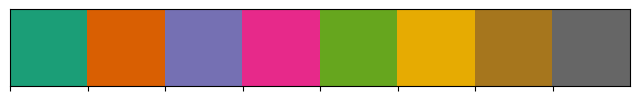

In [85]:
# Définition de la palette de couleurs "Dark2" pour seaborn
palette = "Dark2"

# Définition de la palette de couleurs pour seaborn
sns.set_palette(palette)

# Affichage de la palette de couleurs en utilisant sns.palplot
sns.palplot(sns.color_palette(palette))

# Afficher la palette de couleurs dans un graphique
plt.show()

In [40]:
# Convertir les colonnes 'gdp' et 'population' en types numériques
DF['gdp'] = pd.to_numeric(DF['gdp'], errors='coerce')
DF['population'] = pd.to_numeric(DF['population'], errors='coerce')

# Calculer le PIB par habitant
DF['gdp_per_capita'] = round(DF['gdp'] / DF['population'])

# Vérifier le résultat
print(DF.head())


     country  year  coal_production  electricity_generation  \
5715  France  1990              0.0                 420.751   
5716  France  1991              0.0                 455.555   
5717  France  1992              0.0                 463.639   
5718  France  1993              0.0                 472.707   
5719  France  1994              0.0                 476.868   

      biofuel_electricity  coal_electricity  fossil_electricity  \
5715                2.479            27.004               50.62   
5716                2.479            27.004               50.62   
5717                2.479            27.004               50.62   
5718                2.479            27.004               50.62   
5719                2.479            27.004               50.62   

      gas_electricity  hydro_electricity  nuclear_electricity  ...  gdp  \
5715           11.514             53.866              314.081  ...  NaN   
5716           11.514             57.602              331.340  ...  

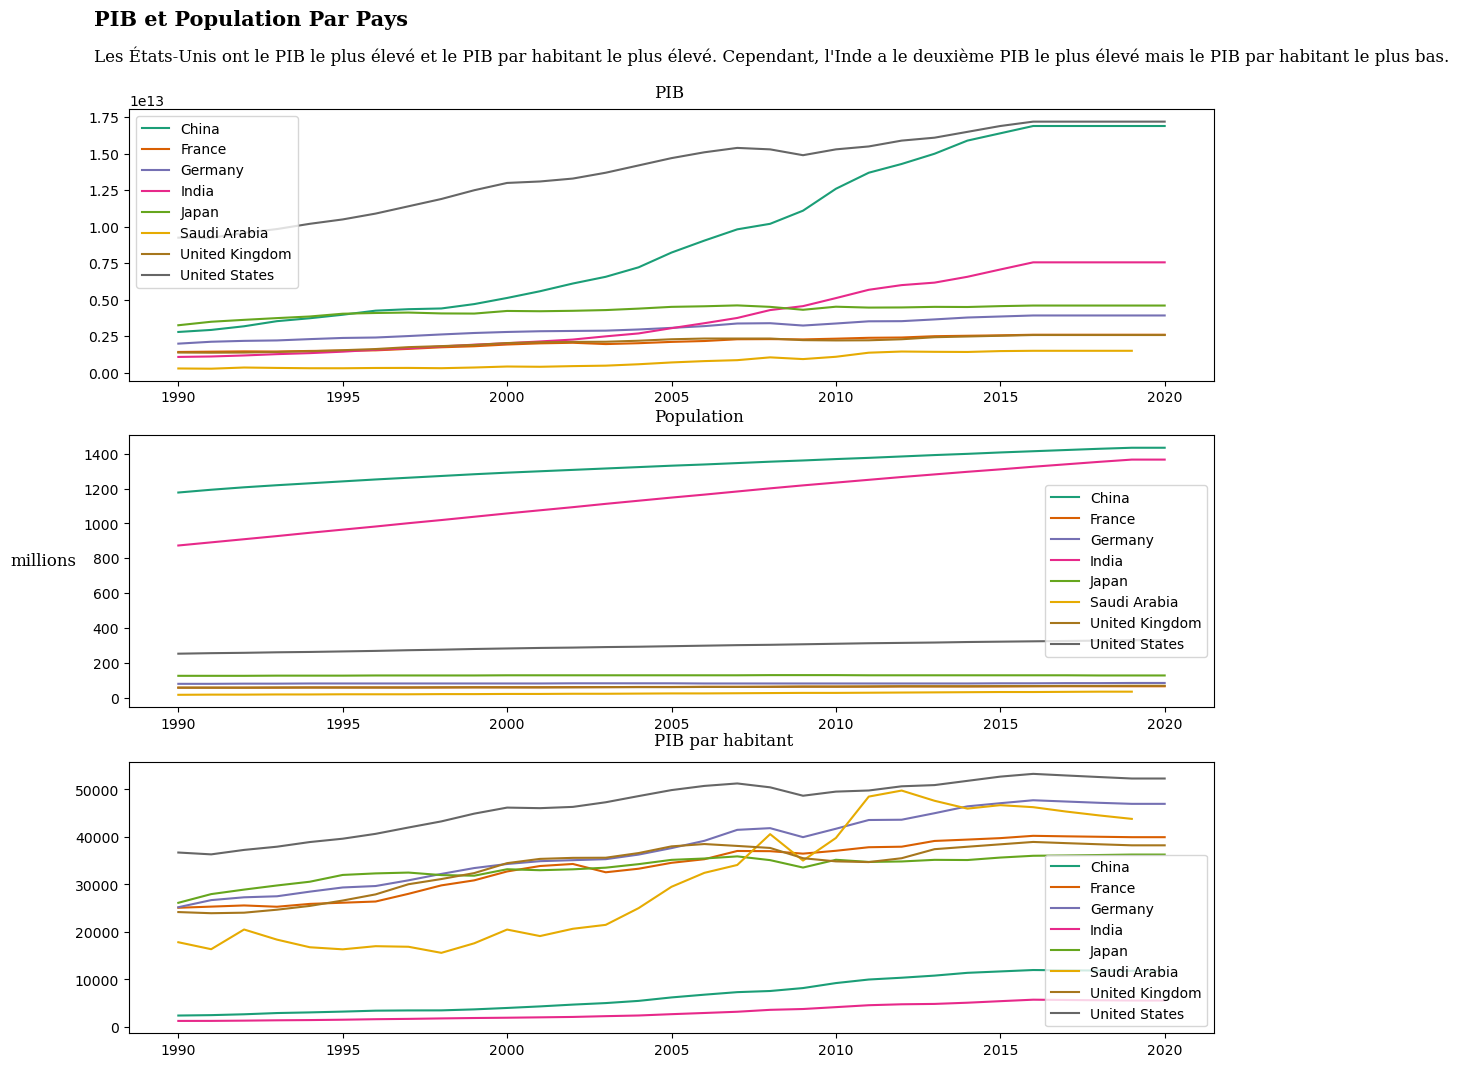

In [90]:
# Groupement des données par année et par pays, puis somme du PIB pour chaque pays par année
DF_gdp = DF.groupby(['year', 'country'])['gdp'].sum().unstack('country')

# Groupement des données par année et par pays, puis somme de la population pour chaque pays par année
DF_pop = DF.groupby(['year', 'country'])['population'].sum().unstack('country')

# Conversion de la population en millions et arrondi au nombre entier le plus proche
DF_pop_mil = round(DF_pop / 1000000)

# Calcul du PIB par habitant en divisant le PIB par la population pour chaque ligne
DF['gdp_per_capita'] = round(DF['gdp'] / DF['population'])

# Groupement des données par année et par pays, puis somme du PIB par habitant pour chaque pays par année
DF_gdp_per_capita = DF.groupby(['year', 'country'])['gdp_per_capita'].sum().unstack('country')

# Création d'une figure avec 3 sous-graphiques empilés verticalement, taille personnalisée
fig, ax = plt.subplots(3, 1, figsize=(14, 12))

# Tracé du PIB pour chaque pays au fil du temps, avec légende affichée
ax[0].plot(DF_gdp, label=DF_gdp.columns)
ax[0].legend()

# Tracé de la population en millions pour chaque pays au fil du temps, avec légende affichée
ax[1].plot(DF_pop_mil, label=DF_pop_mil.columns)
ax[1].legend()

# Tracé du PIB par habitant pour chaque pays au fil du temps, avec légende affichée
ax[2].plot(DF_gdp_per_capita, label=DF_gdp_per_capita.columns)
ax[2].legend()

# Ajout de titres et d'annotations au graphique
fig.text(0.1, 0.95, 'PIB et Population Par Pays', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.1, 0.92, 
'''Les États-Unis ont le PIB le plus élevé et le PIB par habitant le plus élevé. Cependant, l'Inde a le deuxième PIB le plus élevé mais le PIB par habitant le plus bas.'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.04, 0.5, 
'''millions'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.5, 0.89, 
'''PIB'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.5, 0.62,
'''Population'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.5, 0.35,
'''PIB par habitant'''
, fontsize=12, fontweight='light', fontfamily='serif')

# Affichage du graphique
plt.show()

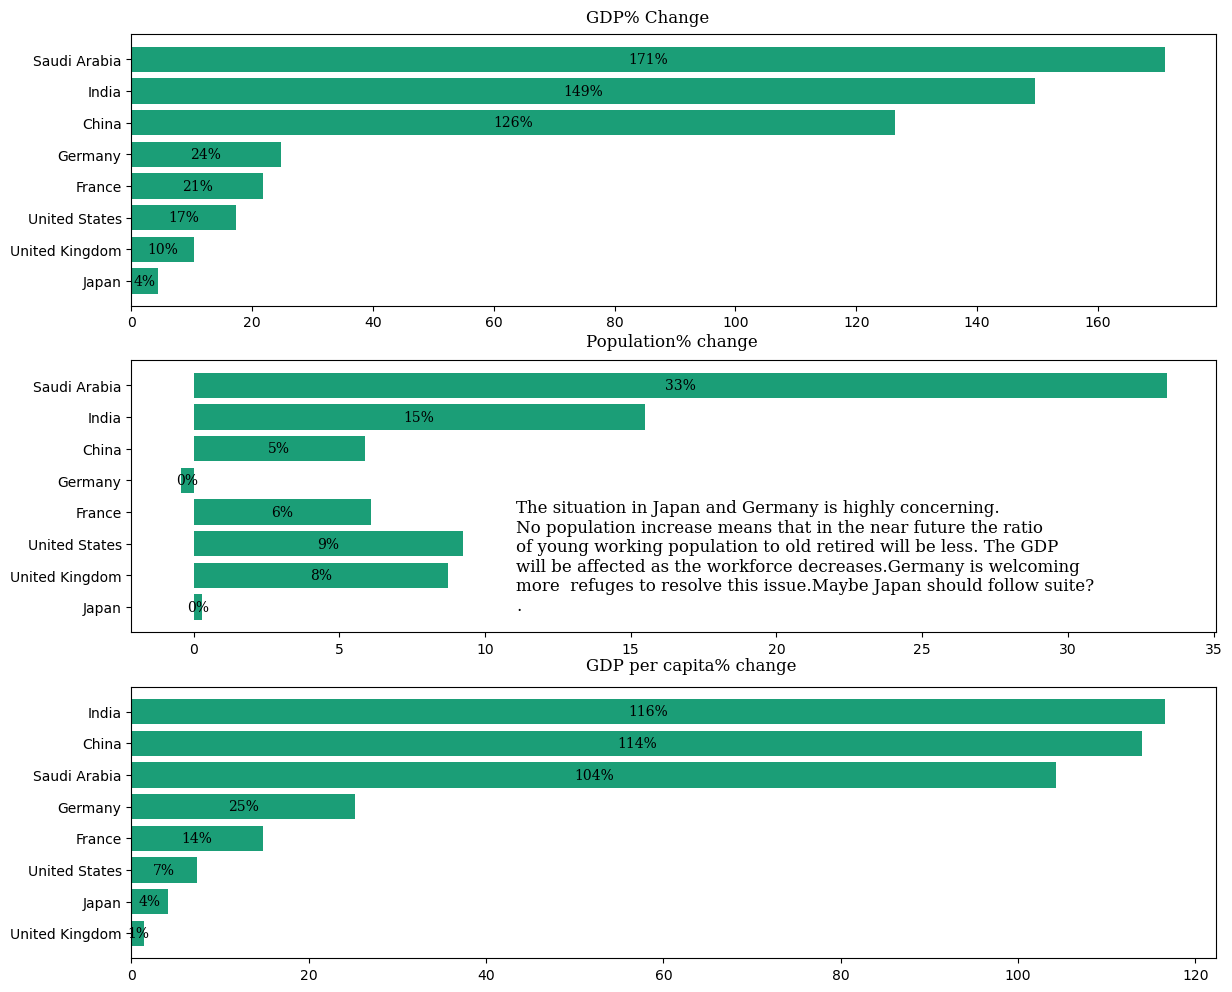

In [111]:
#We will create a comparision between the cannges in gdp and population per country in the 
#durations 2000-2005 and 2010-2015 
#gdp %increase
DF_comparision =pd.DataFrame()
DF_comparision['DF_2000_2005_gdp']=DF[(DF['year']>=2000) & (DF['year']<=2005)].groupby('country')['gdp'].mean()
DF_comparision['DF_2010_2015_gdp']=DF[(DF['year']>=2010) & (DF['year']<=2015)].groupby('country')['gdp'].mean()
DF_comparision['gdp_diffrence%']=100*(DF_comparision['DF_2010_2015_gdp']-DF_comparision['DF_2000_2005_gdp'])/DF_comparision['DF_2000_2005_gdp']
DF_comparision.sort_values('gdp_diffrence%',ascending=True,inplace=True)
fig, ax = plt.subplots(3, 1, figsize=(14, 12))
ax[0].barh(DF_comparision.index,DF_comparision['gdp_diffrence%'])
for i in DF_comparision.index:
    ax[0].annotate(f"{int(DF_comparision['gdp_diffrence%'][i])}%", 
                   xy=(DF_comparision['gdp_diffrence%'][i]/2, i),
                   va = 'center', ha='center',fontsize=10, fontweight='light', fontfamily='serif',
                   color='black')
#pop %increase
DF_comparision['DF_2000_2005_pop']=DF[(DF['year']>=2000) & (DF['year']<=2005)].groupby('country')['population'].mean()
DF_comparision['DF_2010_2015_pop']=DF[(DF['year']>=2010) & (DF['year']<=2015)].groupby('country')['population'].mean()
DF_comparision['pop_diffrence%']=100*(DF_comparision['DF_2010_2015_pop']-DF_comparision['DF_2000_2005_pop'])/DF_comparision['DF_2000_2005_pop']
DF_comparision.sort_values('gdp_diffrence%',ascending=True,inplace=True)
DF_comparision.head()
ax[1].barh(DF_comparision.index,DF_comparision['pop_diffrence%'])
for i in DF_comparision.index:
    ax[1].annotate(f"{int(DF_comparision['pop_diffrence%'][i])}%", 
                   xy=(DF_comparision['pop_diffrence%'][i]/2, i),
                   va = 'center', ha='center',fontsize=10, fontweight='light', fontfamily='serif',
                   color='black')
#gdp per Capita
DF_comparision['DF_2000_2005_gpercapita']=DF[(DF['year']>=2000) & (DF['year']<=2005)].groupby('country')['gdp_per_capita'].mean()
DF_comparision['DF_2010_2015_gpercapita']=DF[(DF['year']>=2010) & (DF['year']<=2015)].groupby('country')['gdp_per_capita'].mean()
DF_comparision['gpercapita_diffrence%']=100*(DF_comparision['DF_2010_2015_gpercapita']-DF_comparision['DF_2000_2005_gpercapita'])/DF_comparision['DF_2000_2005_gpercapita']
DF_comparision.sort_values('gpercapita_diffrence%',ascending=True,inplace=True)
ax[2].barh(DF_comparision.index,DF_comparision['gpercapita_diffrence%'])
for i in DF_comparision.index:
    ax[2].annotate(f"{int(DF_comparision['gpercapita_diffrence%'][i])}%", 
                   xy=(DF_comparision['gpercapita_diffrence%'][i]/2, i),
                   va = 'center', ha='center',fontsize=10, fontweight='light', fontfamily='serif',
                   color='black')
fig.text(0.45, 0.89, 
'''GDP% Change'''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.45, 0.62,
'''Population% change '''
, fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.45, 0.35,
'''GDP per capita% change'''
, fontsize=12, fontweight='light', fontfamily='serif')

fig.text(0.4, 0.4, 
'''The situation in Japan and Germany is highly concerning.
No population increase means that in the near future the ratio
of young working population to old retired will be less. The GDP
will be affected as the workforce decreases.Germany is welcoming 
more  refuges to resolve this issue.Maybe Japan should follow suite?
.'''
, fontsize=12, fontweight='light', fontfamily='serif')
    
plt.show()



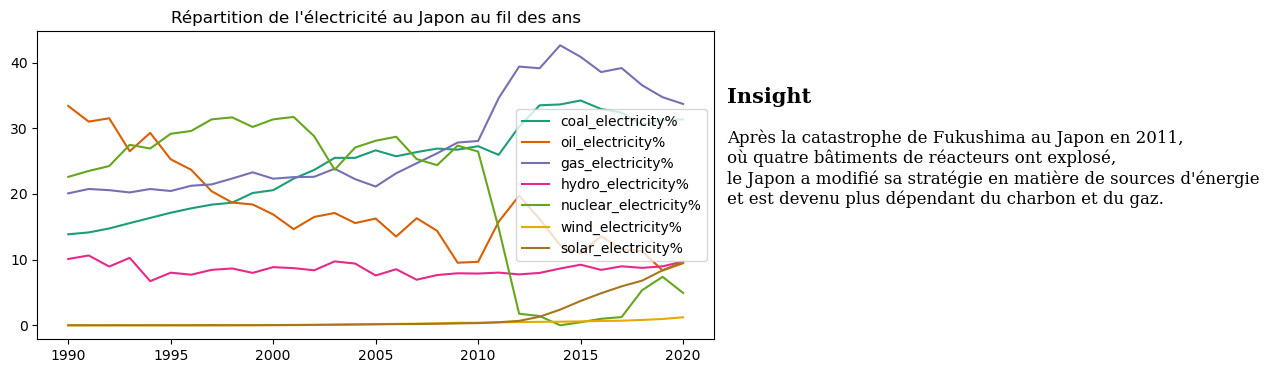

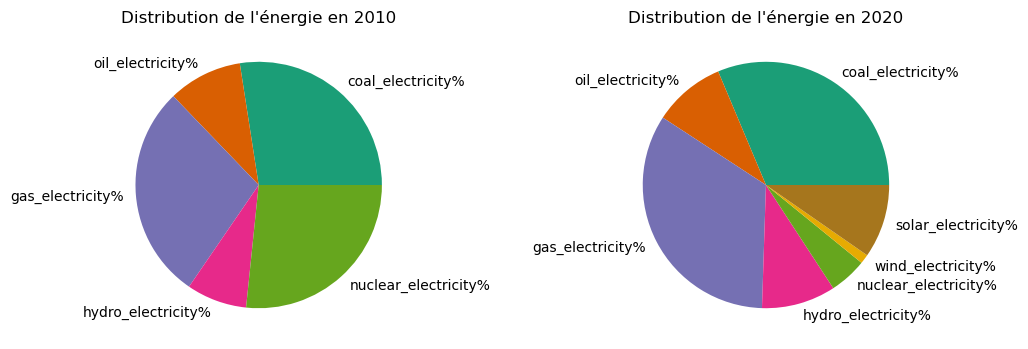

In [112]:
# Définir les sources d'énergie à analyser
Parse = ['coal_electricity', 'oil_electricity', 'gas_electricity', 'hydro_electricity', 'nuclear_electricity', 'wind_electricity', 'solar_electricity']

# Calculer la consommation totale d'énergie en ajoutant une colonne 'total' dans le DataFrame DF
DF['total'] = DF[Parse].sum(axis=1)

# Créer un nouveau DataFrame DF_Electricity pour stocker les données d'électricité
DF_Electricity = DF[['year', 'country']]

# Calculer le pourcentage de chaque source d'énergie par rapport à la consommation totale
for i in Parse:
    DF_Electricity[f"{i}%"] = round(100 * (DF[i] / DF['total']), 4)

# Créer une figure avec deux sous-graphiques
fig, ax = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [4, 1]})

# Sélectionner les données pour le Japon et calculer la moyenne par année
chart_DF = DF_Electricity[DF_Electricity['country'] == 'Japan'].groupby('year').mean()

# Tracer le graphique linéaire de la répartition de l'électricité au Japon au fil des ans
ax[0].plot(chart_DF, label=chart_DF.columns)
ax[0].set_title("Répartition de l'électricité au Japon au fil des ans")
ax[0].legend()

# Masquer le deuxième sous-graphique (utilisé pour afficher les commentaires)
ax[1].axis('off')

# Ajouter un texte explicatif
fig.text(0.7, 0.7, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.7, 0.4, '''
Après la catastrophe de Fukushima au Japon en 2011,
où quatre bâtiments de réacteurs ont explosé,
le Japon a modifié sa stratégie en matière de sources d'énergie
et est devenu plus dépendant du charbon et du gaz.
''', fontsize=12, fontweight='light', fontfamily='serif')

# Créer une liste des années à comparer (2010 et 2020)
years = [2010, 2020]

# Initialiser un compteur pour les sous-graphiques des graphiques circulaires
count = 0

# Créer une nouvelle figure pour les graphiques circulaires
fig2, ay = plt.subplots(1, 2, figsize=(12, 4))

# Boucler à travers les années spécifiées pour créer les graphiques circulaires
for y in years:
    # Sélectionner les données pour une année donnée
    chart_DF_pie_1 = chart_DF[(chart_DF.index.values == y)]
    
    # Supprimer les colonnes avec des pourcentages inférieurs à 1% pour des étiquetages plus clairs
    for i in chart_DF_pie_1.columns:
        if chart_DF_pie_1.iloc[0][i] < 1:
            chart_DF_pie_1.drop(columns=[i], axis=1, inplace=True)
    
    # Tracer un graphique circulaire pour représenter la distribution de l'énergie
    ay[count].pie(chart_DF_pie_1.iloc[0].values, labels=chart_DF_pie_1.columns)
    ay[count].set_title(f"Distribution de l'énergie en {int(y)}")
    
    # Incrémenter le compteur pour passer au prochain sous-graphique
    count = count + 1

# Afficher les graphiques
plt.show()


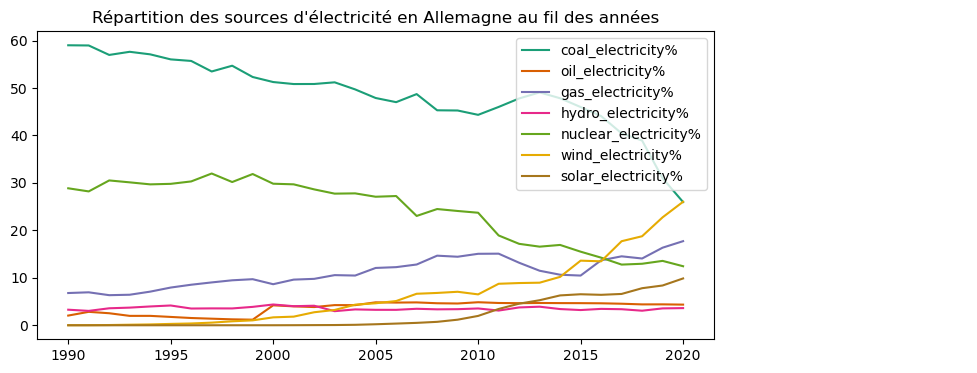

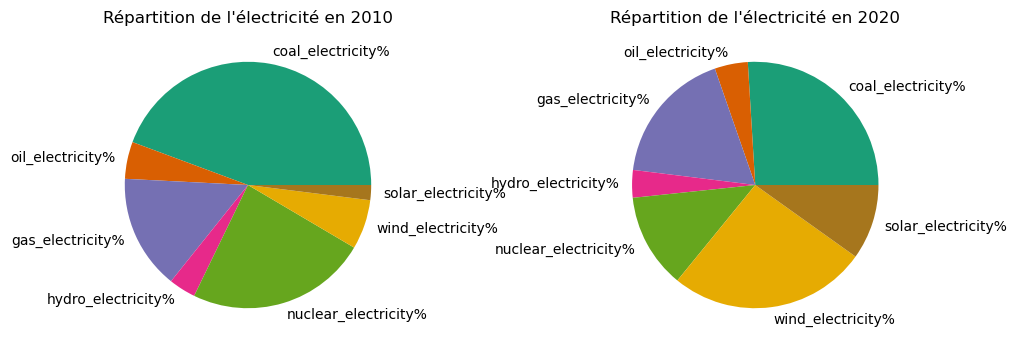

In [131]:
# Obtenir la part en pourcentage de l'électricité par rapport à l'ensemble des sources d'énergie
Colonnes_sources = ['coal_electricity', 'oil_electricity', 'gas_electricity', 'hydro_electricity', 'nuclear_electricity', 'wind_electricity', 'solar_electricity']
DF['total'] = DF[Colonnes_sources].sum(axis=1)
DF_Electricity = DF[['year', 'country']]
for i in Colonnes_sources:
    DF_Electricity[f"{i}%"] = round(100 * (DF[i] / DF['total']), 4)

# Tracer l'évolution en pourcentage au fil des années
fig3, ax3 = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [4, 1]})
chart_DF = DF_Electricity[DF_Electricity['country'] == 'Germany'].groupby('year').mean()
ax3[0].plot(chart_DF, label=chart_DF.columns)
ax3[0].set_title("Répartition des sources d'électricité en Allemagne au fil des années")
ax3[0].legend()
ax3[1].axis('off')

# Tracer les graphiques circulaires pour la répartition de l'énergie et comparer 2010 et 2020
# Pour les graphiques circulaires, il est préférable de supprimer les colonnes avec des valeurs nulles pour ne pas affecter l'étiquetage
années = [2010, 2020]
count = 0
fig4, ay3 = plt.subplots(1, 2, figsize=(12, 4))
for y in années:
    chart_DF_pie_1 = chart_DF[(chart_DF.index.values == y)]
    for i in chart_DF_pie_1.columns:
        if chart_DF_pie_1.iloc[0][i] < 1:
            chart_DF_pie_1.drop(columns=[i], axis=1, inplace=True)
    ay3[count].pie(chart_DF_pie_1.iloc[0].values, labels=chart_DF_pie_1.columns)
    ay3[count].set_title(f"Répartition de l'électricité en {int(y)}")
    count = count + 1

plt.show()


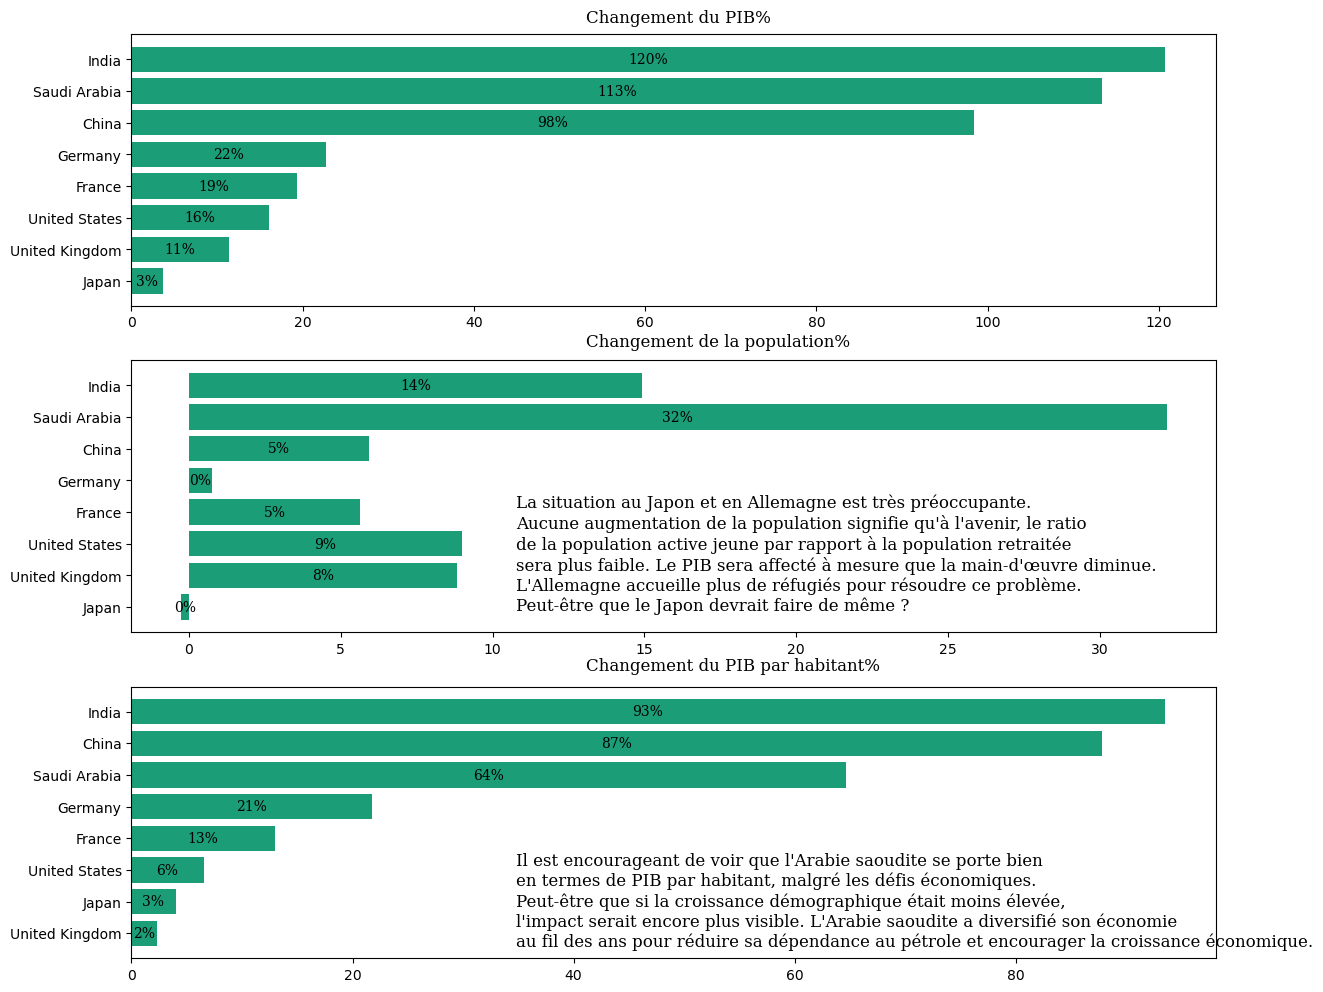

In [121]:
# Nous allons créer une comparaison entre les changements dans le PIB et la population par pays
# pour les périodes 2000-2009 et 2010-2020.

# Augmentation du PIB en %
DF_comparision = pd.DataFrame()
DF_comparision['DF_2000_2009_gdp'] = DF[(DF['year'] >= 2000) & (DF['year'] <= 2009)].groupby('country')['gdp'].mean()
DF_comparision['DF_2010_2020_gdp'] = DF[(DF['year'] >= 2010) & (DF['year'] <= 2020)].groupby('country')['gdp'].mean()
DF_comparision['gdp_diffrence%'] = 100 * (DF_comparision['DF_2010_2020_gdp'] - DF_comparision['DF_2000_2009_gdp']) / DF_comparision['DF_2000_2009_gdp']
DF_comparision.sort_values('gdp_diffrence%', ascending=True, inplace=True)

# Création de la figure avec 3 sous-graphiques
fig, ax = plt.subplots(3, 1, figsize=(14, 12))

# Tracé des barres horizontales pour la variation du PIB avec des annotations
ax[0].barh(DF_comparision.index, DF_comparision['gdp_diffrence%'])
for i in DF_comparision.index:
    ax[0].annotate(f"{int(DF_comparision['gdp_diffrence%'][i])}%",
                   xy=(DF_comparision['gdp_diffrence%'][i] / 2, i),
                   va='center', ha='center', fontsize=10, fontweight='light', fontfamily='serif',
                   color='black')

# Augmentation de la population en %
DF_comparision['DF_2000_2009_pop'] = DF[(DF['year'] >= 2000) & (DF['year'] <= 2009)].groupby('country')['population'].mean()
DF_comparision['DF_2010_2020_pop'] = DF[(DF['year'] >= 2010) & (DF['year'] <= 2020)].groupby('country')['population'].mean()
DF_comparision['pop_diffrence%'] = 100 * (DF_comparision['DF_2010_2020_pop'] - DF_comparision['DF_2000_2009_pop']) / DF_comparision['DF_2000_2009_pop']
DF_comparision.sort_values('gdp_diffrence%', ascending=True, inplace=True)

# Tracé des barres horizontales pour la variation de la population avec des annotations
ax[1].barh(DF_comparision.index, DF_comparision['pop_diffrence%'])
for i in DF_comparision.index:
    ax[1].annotate(f"{int(DF_comparision['pop_diffrence%'][i])}%",
                   xy=(DF_comparision['pop_diffrence%'][i] / 2, i),
                   va='center', ha='center', fontsize=10, fontweight='light', fontfamily='serif',
                   color='black')

# Variation du PIB par habitant en %
DF_comparision['DF_2000_2009_gpercapita'] = DF[(DF['year'] >= 2000) & (DF['year'] <= 2009)].groupby('country')['gdp_per_capita'].mean()
DF_comparision['DF_2010_2020_gpercapita'] = DF[(DF['year'] >= 2010) & (DF['year'] <= 2020)].groupby('country')['gdp_per_capita'].mean()
DF_comparision['gpercapita_diffrence%'] = 100 * (DF_comparision['DF_2010_2020_gpercapita'] - DF_comparision['DF_2000_2009_gpercapita']) / DF_comparision['DF_2000_2009_gpercapita']
DF_comparision.sort_values('gpercapita_diffrence%', ascending=True, inplace=True)

# Tracé des barres horizontales pour la variation du PIB par habitant avec des annotations
ax[2].barh(DF_comparision.index, DF_comparision['gpercapita_diffrence%'])
for i in DF_comparision.index:
    ax[2].annotate(f"{int(DF_comparision['gpercapita_diffrence%'][i])}%",
                   xy=(DF_comparision['gpercapita_diffrence%'][i] / 2, i),
                   va='center', ha='center', fontsize=10, fontweight='light', fontfamily='serif',
                   color='black')

# Ajout de titres aux sous-graphiques
fig.text(0.45, 0.89, 'Changement du PIB%', fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.45, 0.62, 'Changement de la population%', fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.45, 0.35, 'Changement du PIB par habitant%', fontsize=12, fontweight='light', fontfamily='serif')

# Ajout de textes explicatifs à la figure
fig.text(0.4, 0.4, '''La situation au Japon et en Allemagne est très préoccupante.
Aucune augmentation de la population signifie qu'à l'avenir, le ratio
de la population active jeune par rapport à la population retraitée
sera plus faible. Le PIB sera affecté à mesure que la main-d'œuvre diminue.
L'Allemagne accueille plus de réfugiés pour résoudre ce problème.
Peut-être que le Japon devrait faire de même ?''',
         fontsize=12, fontweight='light', fontfamily='serif')

fig.text(0.4, 0.12, '''Il est encourageant de voir que l'Arabie saoudite se porte bien
en termes de PIB par habitant, malgré les défis économiques.
Peut-être que si la croissance démographique était moins élevée,
l'impact serait encore plus visible. L'Arabie saoudite a diversifié son économie
au fil des ans pour réduire sa dépendance au pétrole et encourager la croissance économique.''',
         fontsize=12, fontweight='light', fontfamily='serif')

plt.show()




In [147]:
DF.head(10)

,country,year,coal_production,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,...,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_share_elec,gas_share_elec,gas_production,low_carbon_share_elec,gdp_per_capita,total
3435,China,1990,6279.525,621.20,2.421,441.251,494.388,2.771,126.744,0.000,...,0.002,0.002,2.858,6774.271,79.586,0.446,154.184,20.414,2371.0,621.136
3436,China,1991,6323.271,677.55,2.421,498.434,552.786,2.429,124.689,0.000,...,0.002,0.009,2.859,7021.384,81.586,0.358,156.119,18.414,2456.0,677.486
3437,China,1992,6491.755,753.94,2.421,567.330,623.007,2.467,130.686,0.000,...,0.003,0.131,2.774,7309.315,82.633,0.327,159.142,17.367,2635.0,753.827
3438,China,1993,6691.151,811.59,2.421,589.228,657.806,3.124,151.846,1.604,...,0.004,0.212,2.690,7792.128,81.052,0.385,168.969,18.948,2896.0,811.472
3439,China,1994,7210.030,927.80,2.421,693.408,744.761,3.154,167.429,14.756,...,0.005,0.384,2.703,8195.959,80.272,0.340,176.971,19.728,3032.0,927.335
3440,China,1995,7912.657,1007.03,2.421,741.886,799.979,2.999,190.580,12.833,...,0.007,0.616,2.617,8373.590,79.439,0.298,180.912,20.560,3199.0,1004.015
3441,China,1996,8121.814,1081.31,2.421,824.184,877.363,2.828,187.970,14.338,...,0.009,0.094,2.572,8734.282,81.139,0.262,202.722,18.861,3396.0,1079.774
3442,China,1997,8068.501,1135.55,2.421,867.027,922.219,8.077,195.980,14.418,...,0.011,0.198,2.528,8712.993,81.213,0.711,228.816,18.786,3447.0,1132.826
3443,China,1998,7745.753,1167.00,2.421,891.674,951.158,6.092,198.890,14.100,...,0.014,0.356,2.502,8656.426,81.505,0.522,234.621,18.495,3459.0,1164.518
3444,China,1999,7931.651,1239.30,2.421,969.684,1024.758,4.813,196.580,14.949,...,0.017,0.474,2.425,8893.213,82.688,0.388,253.962,17.311,3668.0,1236.778


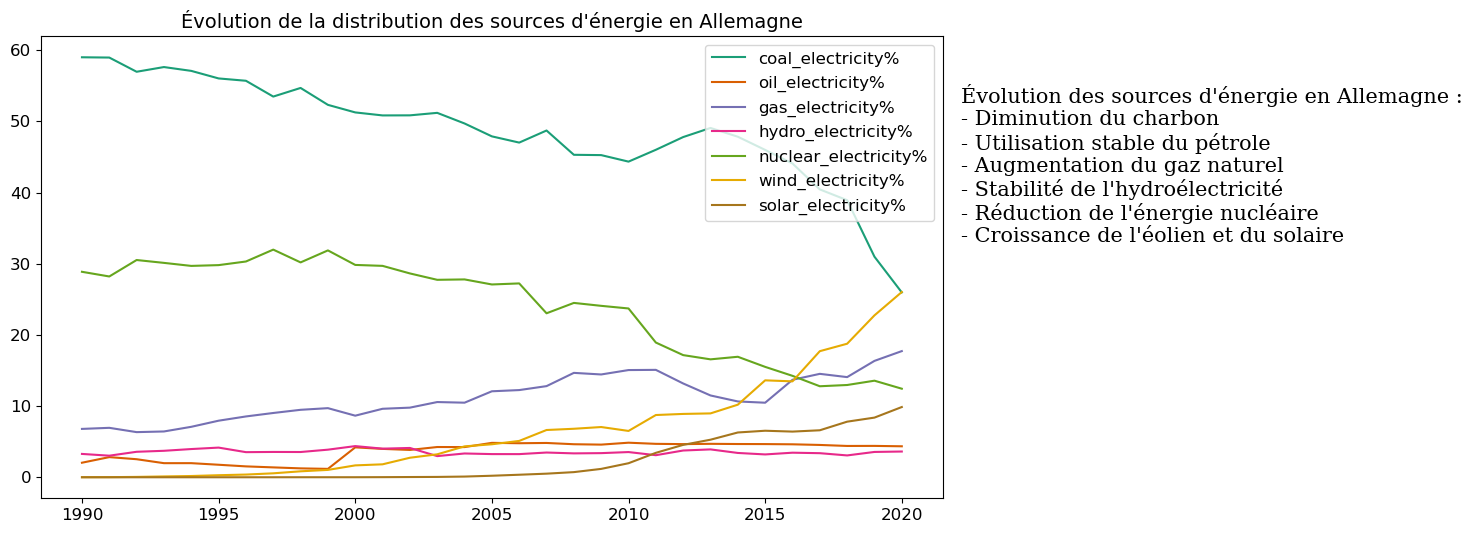

In [157]:
DF['total'] = DF[sources_energie].sum(axis=1)
DF_Electricity = DF[['year', 'country']]
for source in sources_energie:
    DF_Electricity[f"{source}%"] = round(100 * (DF[source] / DF['total']), 4)

# Création de la première figure avec deux sous-figures (taille plus grande)
fig3, ax3 = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [4, 1]})

# Sélection des données pour l'Allemagne et calcul de la moyenne par année
chart_DF = DF_Electricity[DF_Electricity['country'] == 'Germany'].groupby('year').mean()

# Tracé de l'évolution de la distribution des sources d'énergie en Allemagne au fil des années
ax3[0].plot(chart_DF, label=chart_DF.columns)
ax3[0].set_title("Évolution de la distribution des sources d'énergie en Allemagne", fontsize=14)  # Taille du titre
ax3[0].legend(fontsize=12)  # Taille de la légende
ax3[0].tick_params(labelsize=12)  # Taille des étiquettes des axes
ax3[1].axis('off')

# Ajouter un commentaire à côté de la figure avec une taille de police plus grande
commentaire = '''
Évolution des sources d'énergie en Allemagne :
- Diminution du charbon
- Utilisation stable du pétrole
- Augmentation du gaz naturel
- Stabilité de l'hydroélectricité
- Réduction de l'énergie nucléaire
- Croissance de l'éolien et du solaire
'''

fig3.text(0.7, 0.5, commentaire, fontsize=15, fontweight='light', fontfamily='serif')

# Afficher la figure
plt.show()